# **COMP2211 Exploring Artificial Inteligence** 

## Lab7 : Digital Image Processing Fundamentals

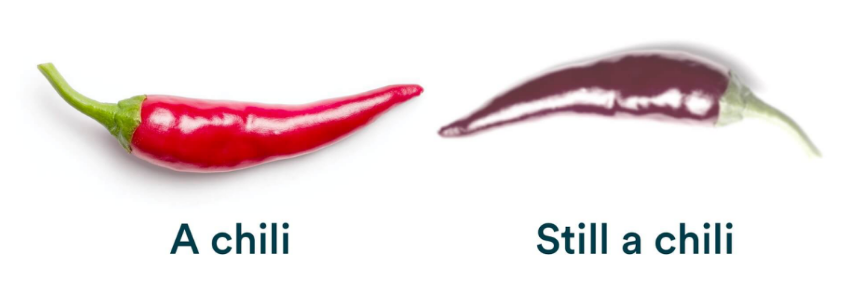

## **Introduction**
The task of Lab 7 is to conduct data augmentation for the given images, using the image processing techniques we learned from the lecture. 

**Data augmentation** is a frequently used technique in machine learning, which helps reduce overfitting and enlarges training dataset by producing slightly modified copies of the existing training data. In image classification, an image from the training set will undergo a series of image transformations randomly to obtain a modified but *semantic-preserving* image.

### **Tasks**

You will need to implement the following image transformations:


* Image cropping
* Color to grayscale
* Image reflection
* Image rotation
* Image translation
* Image resizing
* Mixup

You are allowed to use the functions from OpenCV or simply implement with NumPy.

### **Download Images**
Run the following cell of code to download four images for later use.

In [3]:
url1 = 'https://www.denofgeek.com/wp-content/uploads/2021/04/Pikachu.png?fit=1920%2C1080'
!wget $url1 -O pikachu.png
url2 = 'https://assets.stickpng.com/images/5859662e4f6ae202fedf2878.png'
!wget $url2 -O charizard.png
url3 = 'https://www.pngmart.com/files/22/Eevee-Pokemon-PNG-File.png'
!wget $url3 -O eevee.png
url4 = 'https://www.pngmart.com/files/22/Squirtle-Pokemon-PNG-Transparent-Image.png'
!wget $url4 -O squirtle.png
!ls

--2023-04-30 16:44:07--  https://www.denofgeek.com/wp-content/uploads/2021/04/Pikachu.png?fit=1920%2C1080
Resolving www.denofgeek.com (www.denofgeek.com)... 192.0.66.88, 2a04:fa87:fffd::c000:4258
Connecting to www.denofgeek.com (www.denofgeek.com)|192.0.66.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1213765 (1.2M) [image/png]
Saving to: ‘pikachu.png’

pikachu.png         100%[===================>]   1.16M  --.-KB/s    in 0.05s   

2023-04-30 16:44:08 (24.9 MB/s) - ‘pikachu.png’ saved [1213765/1213765]

--2023-04-30 16:44:08--  https://assets.stickpng.com/images/5859662e4f6ae202fedf2878.png
Resolving assets.stickpng.com (assets.stickpng.com)... 104.21.234.254, 104.21.235.2, 2606:4700:3038::6815:eafe, ...
Connecting to assets.stickpng.com (assets.stickpng.com)|104.21.234.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409653 (400K) [application/octet-stream]
Saving to: ‘charizard.png’

charizard.png       100%[===============

### **Random Image Cropping**

### **Task description**: 

You need to implement the core of the function `image_crop` by completing the code within the **TODO** area.

The function `image_crop` is supposed to randomly crop a square patch (its size being `crop_size`x`crop_size`) from the given `image`. 

If `crop_size` is larger than the image width (i.e., `image_w`), you need to pad `(crop_size-image_w)` lines of zeros at both the left and right sides of the image. Similarly, do the zero padding if `crop_size` is larger than the image height.

In [ ]:
import cv2 # import opencv
import random # for random number generation

def image_crop(image, crop_size):
  # image: with shape [H, W, C]
  # crop_size: an integer

  image_h, image_w, image_c = image.shape
  
  # check if crop_size larger than image_h
  # if so, pad 0 with (crop_size-image_h) lines, at both the top and bottom sides of the image
  if crop_size > image_h:
    ###########################################################################
    # TODO: your code starts here
    paddingSize_h = crop_size - image_h
    image =  cv2.copyMakeBorder(image, paddingSize_h, paddingSize_h, 0, 0, cv2.BORDER_CONSTANT, value = 0)
    # TODO: your code ends here
    ###########################################################################

  # check if crop_size larger than image_w
  # if so, pad 0 with (crop_size-image_w) lines, at both the left and right sides of the image
  if crop_size > image_w:
    ###########################################################################
    # TODO: your code starts here
    paddingSize_w = crop_size - image_w
    image =  cv2.copyMakeBorder(image, 0, 0, paddingSize_w, paddingSize_w, cv2.BORDER_CONSTANT, value = 0)
    # TODO: your code ends here
    ###########################################################################

  # update image shape
  image_h, image_w, image_c = image.shape

  # generate the top-left corner of the patch randomly
  # you need to make sure the patch is always within the image
  ###########################################################################
  # Hint: You may use random.randint(A, B) to generate a random integer within the interval [A, B]
  # TODO: your code starts here
  # x coordinate of the top-left corner
  patch_xmin = random.randint(0, image_w - crop_size)
  # y coordinate of the top-left corner
  patch_ymin = random.randint(0, image_h - crop_size)
  # TODO: your code ends here
  ###########################################################################

  # calculate the bottom-right corner of the patch
  patch_xmax = patch_xmin + crop_size - 1
  patch_ymax = patch_ymin + crop_size - 1

  # obtain the patch by indexing the image with top-left and bottom-right corners
  return image[patch_ymin:patch_ymax+1, patch_xmin:patch_xmax+1, :]
        

After implementing `image_crop`, you can verify it by running the following code cell.

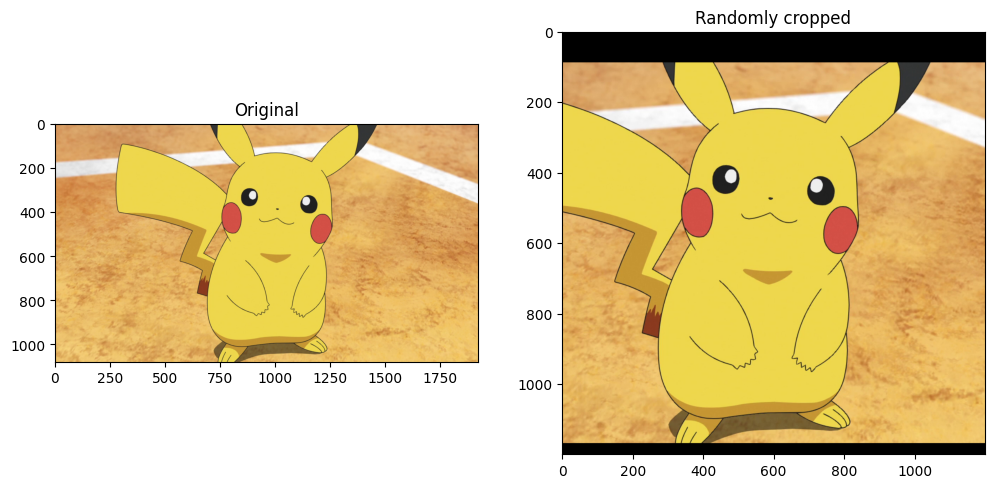

In [ ]:
import matplotlib.pyplot as plt # for plotting images

# read the original image
image = plt.imread('pikachu.png')
# get the cropped image with patch size 2400
image_cropped = image_crop(image, 1200)
# plot both images for comparison
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_cropped)
plt.title('Randomly cropped')
plt.show()

### **Random Grayscale Conversion**

### **Task description**: 

You need to implement the core of the function `color2gray` by completing the code within the **TODO** area.

The function `color2gray` is supposed to randomly convert the given RGB image to grayscale, with probability `prob`. 


In [19]:
import cv2, random
def color2gray(image, prob):
  # image: with shape [H, W, C]
  # prob: a float between 0 and 1
  ###########################################################################
  # Hint: You may use random.random() to generate a random number between 0 and 1 to simulate the probability
  # TODO: your code starts here
  if random.random() < prob:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) 
    plt.imshow(image)
    print(image)
  
  # TODO: your code ends here
  ###########################################################################
  
  # for compatibility, the returned image should with 3 channels, whether it has been converted to grayscale or not 
  return image

After implementing `color2gray`, you can verify it by running the following code cell.

(1080, 1920)
[[[0.61241174 0.61241174 0.61241174]
  [0.61241174 0.61241174 0.61241174]
  [0.61241174 0.61241174 0.61241174]
  ...
  [0.6423333  0.6423333  0.6423333 ]
  [0.6384118  0.6384118  0.6384118 ]
  [0.63449025 0.63449025 0.63449025]]

 [[0.61633337 0.61633337 0.61633337]
  [0.61633337 0.61633337 0.61633337]
  [0.61633337 0.61633337 0.61633337]
  ...
  [0.6384118  0.6384118  0.6384118 ]
  [0.63449025 0.63449025 0.63449025]
  [0.63449025 0.63449025 0.63449025]]

 [[0.62025493 0.62025493 0.62025493]
  [0.62025493 0.62025493 0.62025493]
  [0.62025493 0.62025493 0.62025493]
  ...
  [0.63449025 0.63449025 0.63449025]
  [0.6266471  0.6266471  0.6266471 ]
  [0.6266471  0.6266471  0.6266471 ]]

 ...

 [[0.7653608  0.7653608  0.7653608 ]
  [0.76143926 0.76143926 0.76143926]
  [0.75751764 0.75751764 0.75751764]
  ...
  [0.780153   0.780153   0.780153  ]
  [0.7879961  0.7879961  0.7879961 ]
  [0.7919177  0.7919177  0.7919177 ]]

 [[0.7653608  0.7653608  0.7653608 ]
  [0.75751764 0.75751764

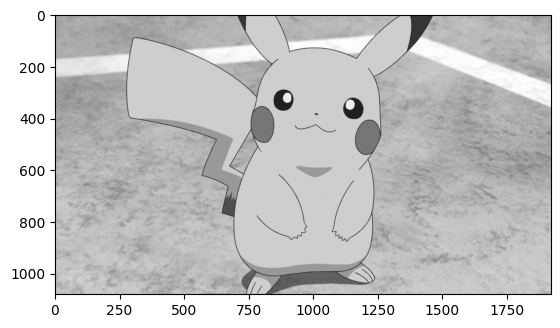

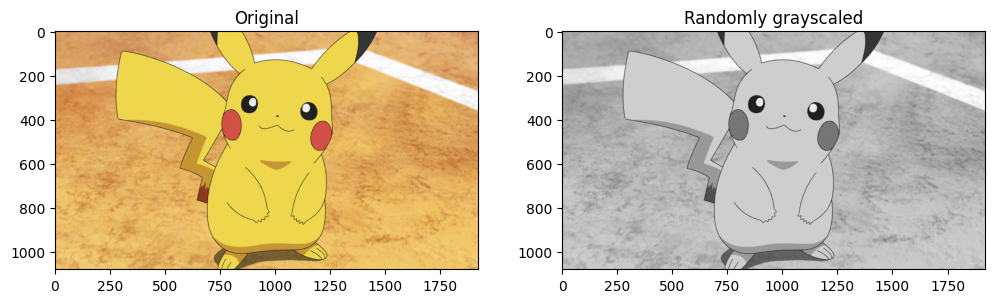

In [21]:
import matplotlib.pyplot as plt # for plotting images

# read the original image
image = plt.imread('pikachu.png')
# convert it to grayscale with probability 0.9
image_gray = color2gray(image, 0.9)
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_gray)
plt.title('Randomly grayscaled')
plt.show()

### **Random Horizontal Flipping**

### **Task description**: 

You need to implement the core of the function `image_flip` by completing the code within the **TODO** area.

The function `image_flip` is supposed to horizontally flip the given image, with probability `prob`. 

In [22]:
import cv2, random

def image_flip(image, prob):
  # image: with shape [H, W, C]
  # prob: a float between 0 and 1
  ###########################################################################
  # Hint: You may use random.random() to generate a random number between 0 and 1 to simulate the probability
  # TODO: your code starts here
  if random.random() < prob:
    [height, width, channels] = image.shape
    image = image[:,::-1,:]


  # TODO: your code ends here
  ###########################################################################
  return image

After implementing `image_flip`, you can verify it by running the following code cell.

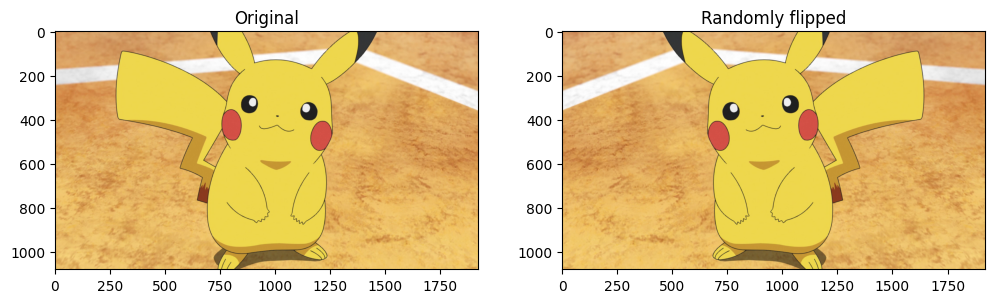

In [24]:
import matplotlib.pyplot as plt # for plotting images

# read the original image
image = plt.imread('pikachu.png')

# horizontally flip the image with probability 0.9
image_flipped = image_flip(image, 0.9)

plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_flipped)
plt.title('Randomly flipped')
plt.show()

### **Random Image Rotation**

### **Task description**: 

You need to implement the core of the function `image_rotate` by completing the code within the **TODO** area.

The function `image_rotate` is supposed to randomly rotate the given image with probability `prob`. When applying rotation, it should be at the center of the image and the degree of rotation is randomly generated within the interval [`-angle`, `angle`], where the `angle` is the input of the function. 

In [27]:
import cv2, random

def image_rotate(image, angle, prob):
  # image: with shape [H, W, C]
  # angle: a float number in degrees. positive for anti-clockwise and negative for clockwise.
  # prob: a float between 0 and 1
  ###########################################################################
  # Hint: You may use random.random() to generate a random number between 0 and 1 to simulate the probability
  # Hint: You may use random.uniform(A, B) to uniformly draw a number within [A, B] for obtaining a random angle
  # Hint: You may use cv2.getRotationMatrix2D for image rotation
  # TODO: your code starts here
  if random.random() < prob:
    height, width, channels = image.shape
    generatedAngle = random.uniform(-angle, angle)
    center = (width/2, height/2)
    rotate_matrix = cv2.getRotationMatrix2D(center, angle, scale = 1)
    image = cv2.warpAffine(image, rotate_matrix, (width, height))

  # TODO: your code ends here
  ###########################################################################
  return image
         

After implementing `image_rotate`, you can verify it by running the following code cell.

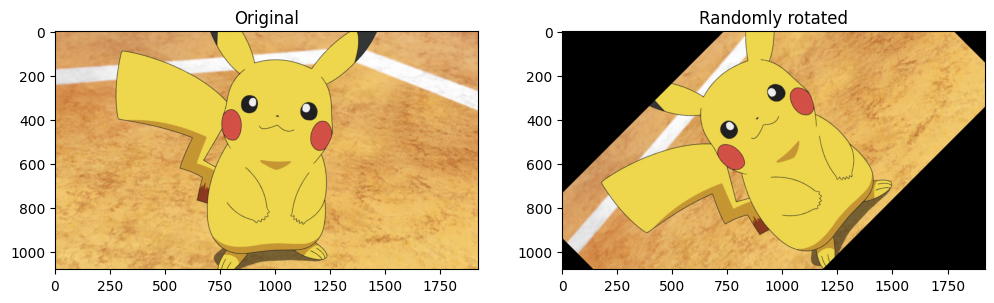

In [28]:
import matplotlib.pyplot as plt

# read the original image
image = plt.imread('pikachu.png')

# randomly rotate the image with probability 0.9, with max degree of 45
image_rotated = image_rotate(image, 45, 0.9)

plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_rotated)
plt.title('Randomly rotated')
plt.show()

### **Random Image Translation**

### **Task description**: 

You need to implement the core of the function `image_translate` by completing the code within the **TODO** area.

The function `image_translate` is supposed to randomly translate the given image with probability `prob`. When applying translation, it should translate the image by `dist_rand` pixels on both the x- and y-axis, where `dist_rand` is randomly generated from the interval [`-dist`, `dist`]. 

In [30]:
import cv2, random
import numpy as np

def image_translate(image, dist, prob):
  # image: with shape [H, W, C]
  # dist: an integer, indicating the largest possible shift in pixels
  #       Note that the shifts on the x- and y-axis can be different.
  # prob: a float between 0 and 1
  ###########################################################################
  # Hint: You may use random.random() to generate a random number between 0 and 1 to simulate the probability
  # Hint: You may use random.uniform to generate random numbers uniformly within a certain interval
  # Hint: You may use cv2.warpAffine for image translation
  # TODO: your code starts here
  if random.random() < prob:
    height, width, channels = image.shape
    dist_rand = random.uniform(-dist, dist)
    M = np.float32([[1, 0, dist_rand],[0, 1, dist_rand]])
    image = cv2.warpAffine(image, M, (width, height))

  # TODO: your code ends here
  ###########################################################################
  return image

After implementing `image_translate`, you can verify it by running the following code cell.

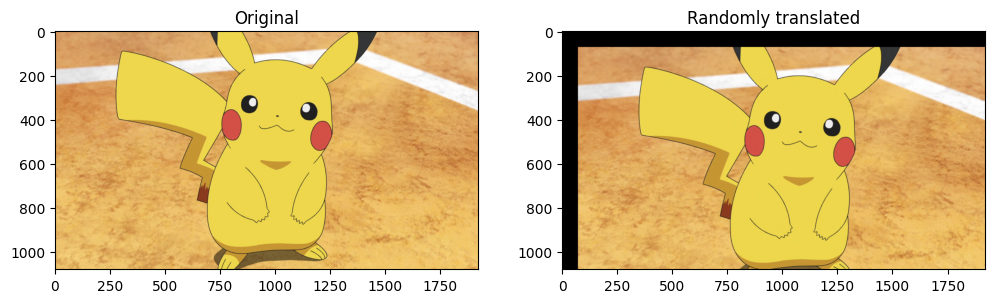

In [31]:
import matplotlib.pyplot as plt

# read the original image
image = plt.imread('pikachu.png')

# randomly translate the image with maximum 200 pixels, and probability 0.9
image_translated = image_translate(image, 200, 0.9)

plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_translated)
plt.title('Randomly translated')
plt.show()

### **Image Resizing**

### **Task description**: 

You need to implement the core of the function `image_resize` by completing the code within the **TODO** area.

The function `image_resize` is supposed to resize the given image to a given size (i.e., `image_size`). 

In [34]:
import cv2, random

def image_resize(image, image_size):
  # image: with shape [H, W, C]
  # image_size: a tuple indicating the height and width of the target size
  ###########################################################################
  # Note: For cv2.resize(img, shape), the shape is a tuple indicating IMAGE_WIDTH and IMAGE_HEIGHT (pay attention to the order)
  # TODO: your code starts here
  image = cv2.resize(image, image_size, interpolation = cv2.INTER_CUBIC)
  # TODO: your code ends here
  ###########################################################################
  return image

After implementing `image_resize`, you can verify it by running the following code cell.

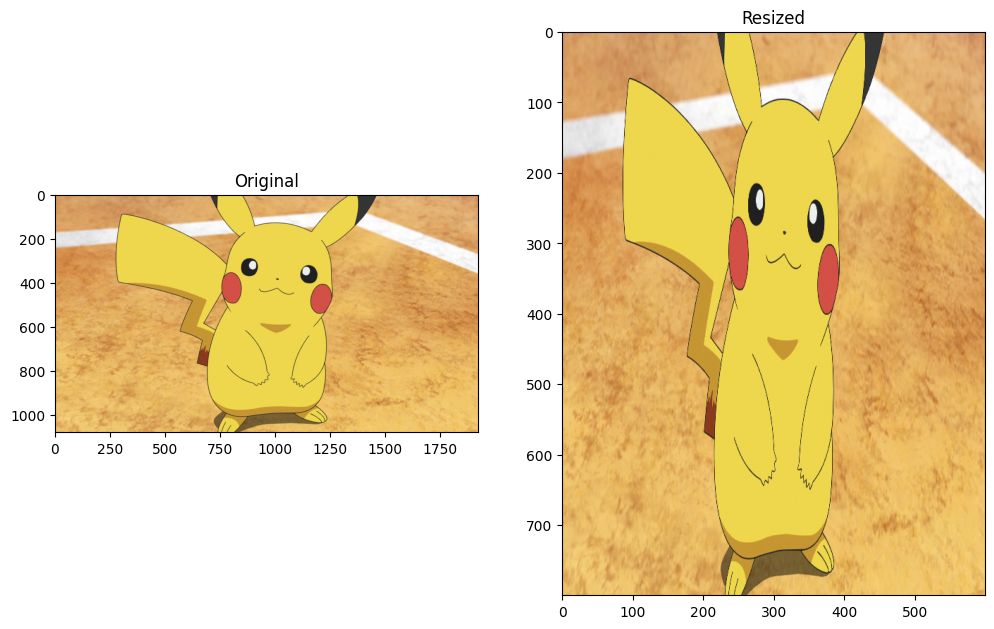

In [35]:
import matplotlib.pyplot as plt

# read the original image
image = plt.imread('pikachu.png')

# resize the image to size (600, 800)
image_resized = image_resize(image, (600, 800))

plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_resized)
plt.title('Resized')
plt.show()

### **Mixup**

[Mixup](https://arxiv.org/abs/1710.09412) is a relatively new technique of data augmentation, which generates new training data by doing convex combination of existing data pairs and their labels. Formally, it can be formulated as:

$$\tilde{x} = \lambda x_i + (1-\lambda) x_j,$$
where $x_i$ and $x_i$ are two randomly selected images, $\lambda$ is the coefficient between [0, 1], and $\tilde{x}$ is the new data. For image classification, the class label also needs to be mixed with the following formula:

$$\tilde{y} = \lambda y_i + (1-\lambda) y_j,$$
where $y_i$ and $y_i$ are the one-hot labels of $x_i$ and $x_j$, respectively, and $\tilde{y}$ is the label of $\tilde{x}$. In this lab, we only focus on the mixup of images since the classification task is not involved.

### **Task description**: 

You need to implement the core of the function `image_mixup` by completing the code within the **TODO** area.

The function `image_mixup` is supposed to generate a new image from the two given images with a random coefficient $\lambda \in [0,1]$. 

In [36]:
def image_mixup(image1, image2):
  # image1: with shape [H, W, C]
  # image2: with shape [H, W, C]
  ###########################################################################
  # Hint: You may use random.random() to generate a random number within [0, 1]
  # TODO: your code starts here
  coef = random.random()
  image_new = coef*image1 + (1-coef)*image2

  # TODO: your code ends here
  ###########################################################################
  return image_new, coef

After implementing `image_mixup`, you can verify it by running the following code cell.

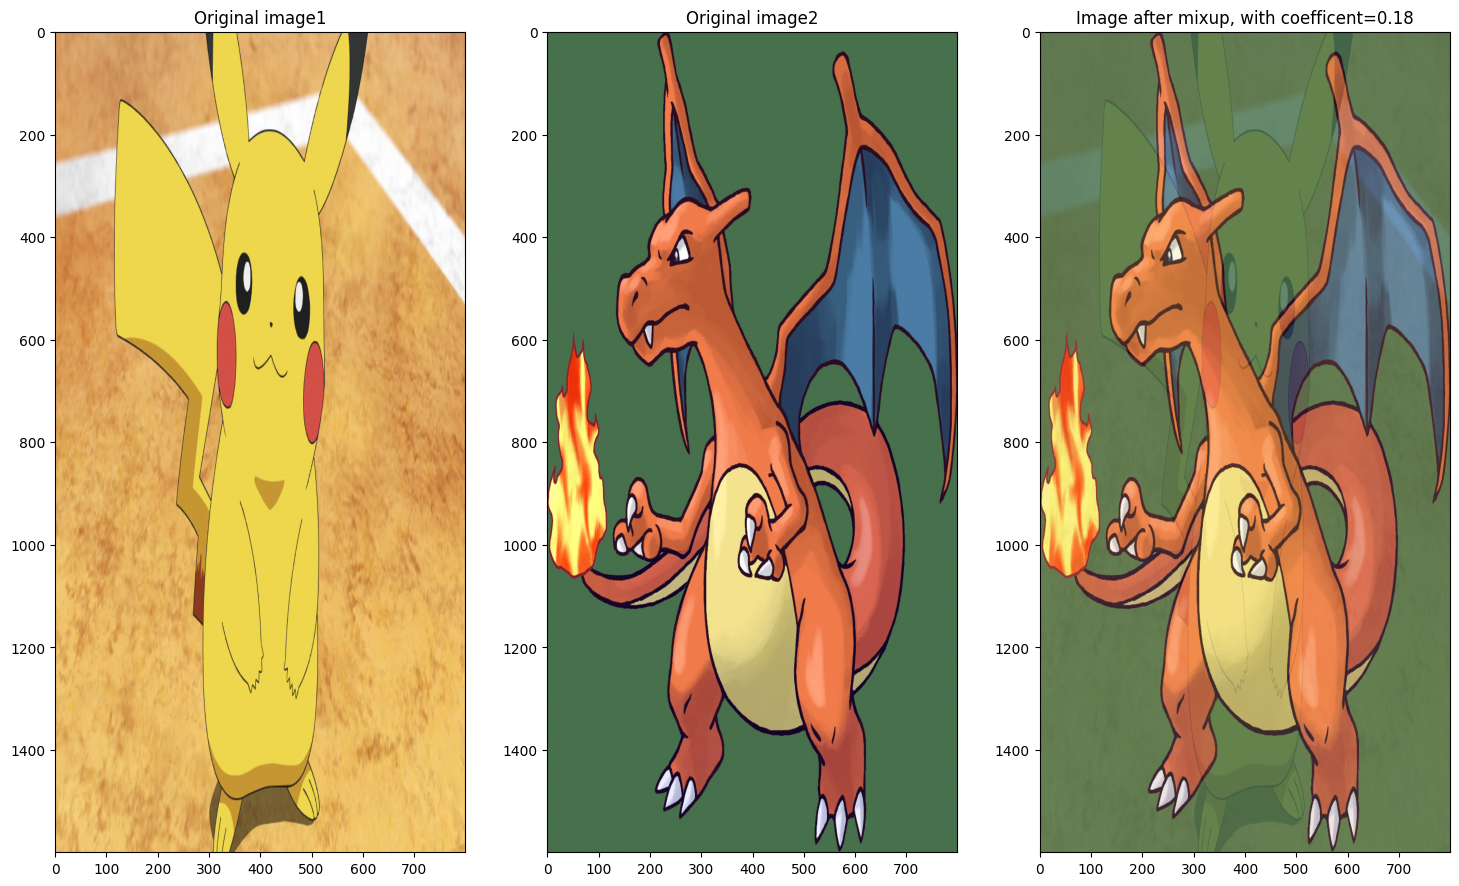

In [37]:
import matplotlib.pyplot as plt

# read two images
image1 = plt.imread('pikachu.png')
image2 = plt.imread('charizard.png')[:,:,:3] # this image has alpha-channel, but we don't need it

# resize the two images to the same size, i.e., (800, 1600)
image1_resized = image_resize(image1, (800, 1600))
image2_resized = image_resize(image2, (800, 1600))

# get a new image with mixup
image_new, coef = image_mixup(image1_resized, image2_resized)

plt.figure(figsize=(18,18))
plt.subplot(1, 3, 1)
plt.imshow(image1_resized)
plt.title('Original image1')
plt.subplot(1, 3, 2)
plt.imshow(image2_resized)
plt.title('Original image2')
plt.subplot(1, 3, 3)
plt.imshow(image_new)
plt.title('Image after mixup, with coefficent={:.2f}'.format(coef))
plt.show()

In practice, mixup is usually conducted within a batch of images. The following function `image_batch_mixup` takes a batch of images as inputs, and randomly mix up a pair of the images to generate a new batch.

In [ ]:
import random

def image_batch_mixup(image_batch, prob):
  # image_batch: a list of images
  indices_rand = list(range(len(image_batch)))
  random.shuffle(indices_rand)
  
  image_batch_new = []
  for i in range(len(image_batch)):
    if random.random() < prob:
      image_new, coef = image_mixup(image_batch[i], image_batch[indices_rand[i]])
      image_batch_new.append(image_new)
    else:
      image_batch_new.append(image_batch[i])
  return image_batch_new

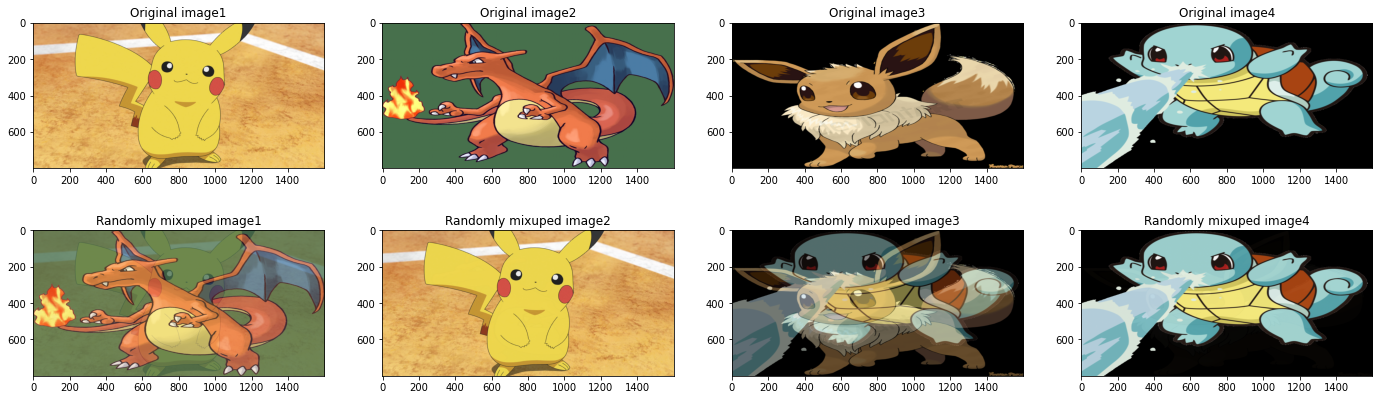

In [ ]:
import matplotlib.pyplot as plt

# read four images
image1 = plt.imread('pikachu.png')
image2 = plt.imread('charizard.png')[:,:,:3]      # this image has alpha-channel, but we don't need it
image3 = plt.imread('eevee.png')[:,:,:3]          # this image has alpha-channel, but we don't need it
image4 = plt.imread('squirtle.png')[:,:,:3]       # this image has alpha-channel, but we don't need it

image_batch = [image1, image2, image3, image4]
# resize the four images to the same size, i.e., (800, 1600)
image_batch = [image_resize(x, (800, 1600)) for x in image_batch]


image_batch_new = image_batch_mixup(image_batch, 0.5)

plt.figure(figsize=(24,7))
for i in range(len(image_batch)):
  plt.subplot(2, len(image_batch), i+1)
  plt.imshow(image_batch[i])
  plt.title('Original image{}'.format(i+1))

for i in range(len(image_batch_new)):
  plt.subplot(2, len(image_batch_new), len(image_batch)+i+1)
  plt.imshow(image_batch_new[i])
  plt.title('Randomly mixuped image{}'.format(i+1))
plt.show()

### **Data Augmentation with Random Transformations**

By putting the above transformations together, we obtain a data augmentor, implemented as function `image_transform`. The function takes as inputs a batch of images and the hyperparameters of the transformations and outputs the randomly transformed image batch.

In [ ]:
def image_batch_transform(image_batch, crop_size, prob_gray, prob_flip, angle, prob_rotate, dist, prob_translate, image_size, prob_mixup):
  # image_batch: a list of images
  # crop_size: the target size of the cropped patch
  # prob_gray: the probability of conducting grayscale conversion
  # prob_flip: the probability of conducting horizontal flipping
  # angle: the maximum agle in degrees for random rotation
  # prob_rotate: the probability of conducting rotation
  # dist: the maximum distance in pixels for image translation
  # prob_translate: the probability of conducting image translation
  # image_size: the target image size for resizing
  # prob_mixup: the probability of conducting mixup

  # for storing transformed images
  image_batch_new = []

  for image in image_batch:
    image_cropped = image_crop(image, crop_size)
    image_gray = color2gray(image_cropped, prob_gray)
    image_flipped = image_flip(image_gray, prob_flip)
    image_rotated = image_rotate(image_flipped, angle, prob_rotate)
    image_translated = image_translate(image_rotated, dist, prob_translate)
    image_resized = image_resize(image_translated, image_size)
    image_batch_new.append(image_resized)

  image_batch_new = image_batch_mixup(image_batch_new, prob_mixup)
  return image_batch_new

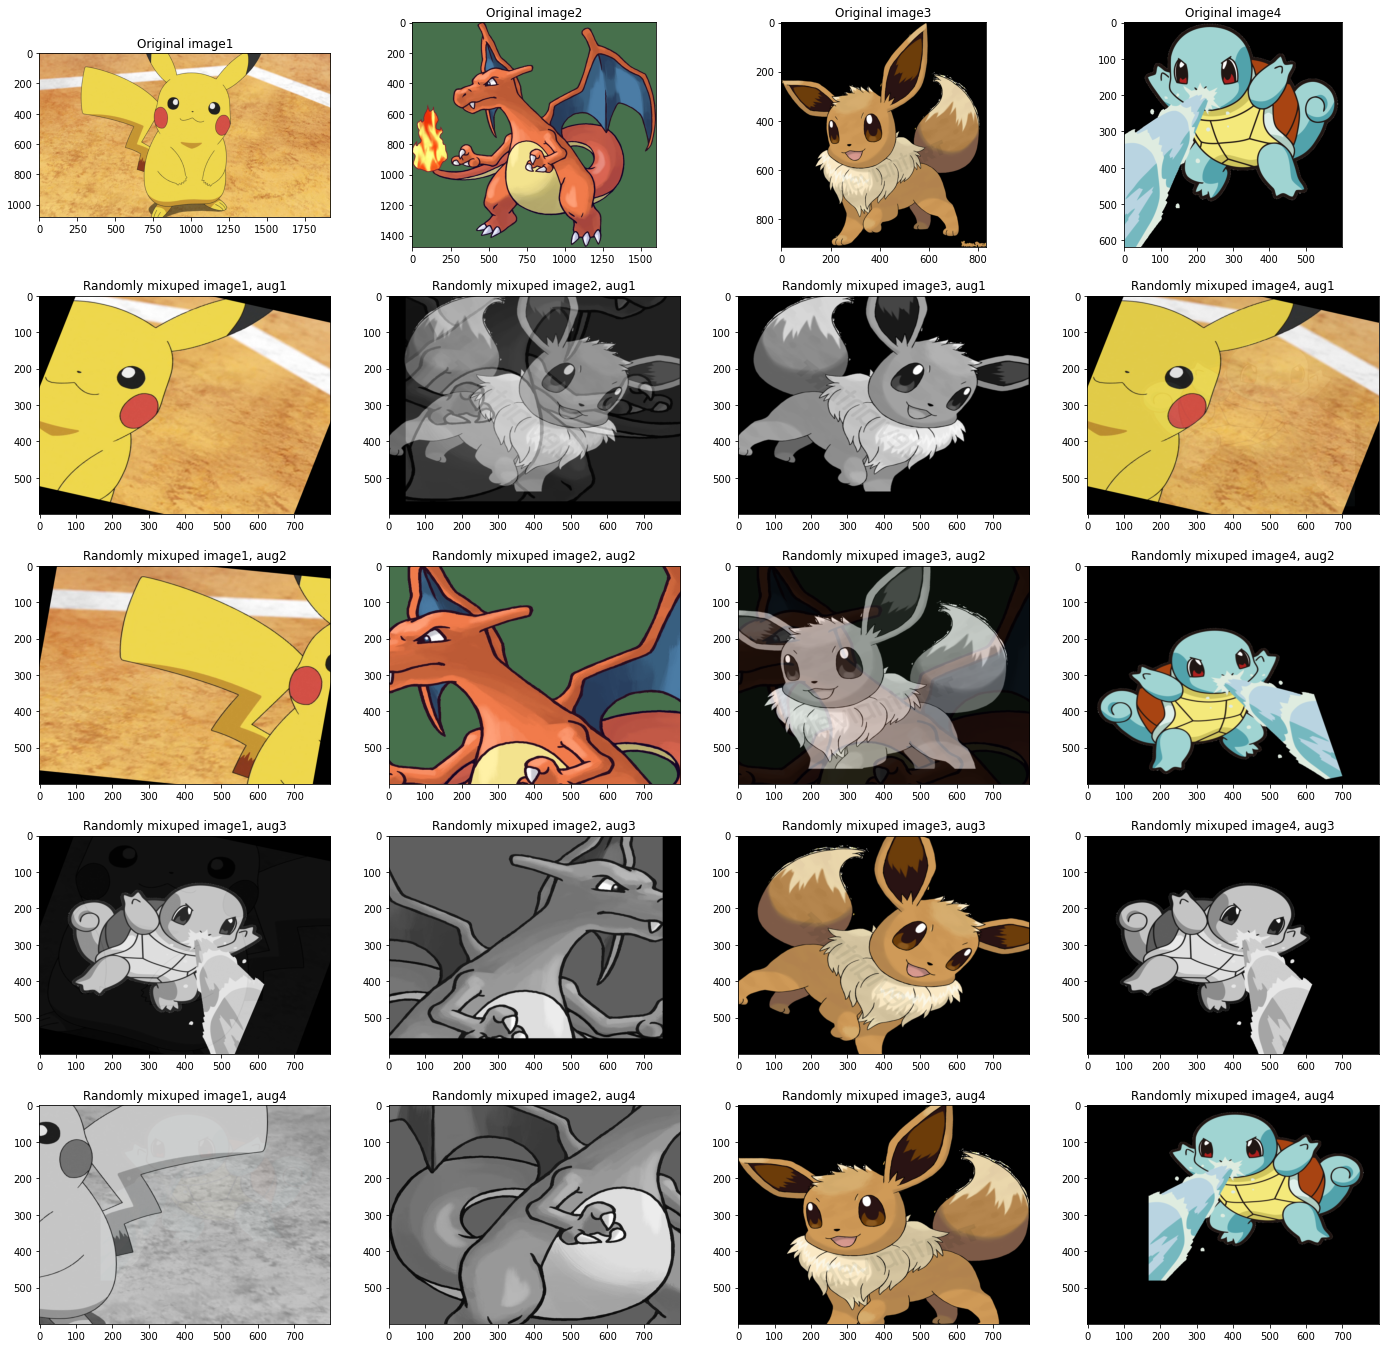

In [ ]:
import matplotlib.pyplot as plt

# read four images
image1 = plt.imread('pikachu.png')
image2 = plt.imread('charizard.png')[:,:,:3] # this image has alpha-channel, but we don't need it
image3 = plt.imread('eevee.png')[:,:,:3] # this image has alpha-channel, but we don't need it
image4 = plt.imread('squirtle.png')[:,:,:3] # this image has alpha-channel, but we don't need it

image_batch = [image1, image2, image3, image4]

# define the hyperparameters
crop_size = 800
prob_gray = 0.5
prob_flip = 0.5
angle = 50
prob_rotate = 0.6
dist = 100
prob_translate = 0.6
image_size = (600, 800)
prob_mixup = 0.5

num_aug = 4 # we do augmentation four times

plt.figure(figsize=(24,24))
for i in range(len(image_batch)):
  plt.subplot(num_aug+1, len(image_batch), i+1)
  plt.imshow(image_batch[i])
  plt.title('Original image{}'.format(i+1))

for j in range(num_aug):
  image_batch_new = image_batch_transform(image_batch, crop_size, prob_gray, prob_flip, angle, prob_rotate, dist, prob_translate, image_size, prob_mixup)

  for i in range(len(image_batch_new)):
    plt.subplot(num_aug+1, len(image_batch), (j+1)*len(image_batch)+i+1)
    plt.imshow(image_batch_new[i])
    plt.title('Randomly mixuped image{}, aug{}'.format(i+1, j+1))